# Open file

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/ColabNotebooks/DAML_LABS/DAML_lab3_geo/headlines.txt", sep="\n", decimal=",")
df

Zika Outbreak Hits Miami
0                      Could Zika Reach New York City?
1                    First Case of Zika in Miami Beach
2              Mystery Virus Spreads in Recife, Brazil
3              Dallas man comes down with case of Zika
4                    Trinidad confirms first Zika case
..                                                 ...
644  Rumors about Rabies spreading in Jerusalem hav...
645              More Zika patients reported in Indang
646  Suva authorities confirmed the spread of Rotav...
647         More Zika patients reported in Bella Vista
648                     Zika Outbreak in Wichita Falls

[649 rows x 1 columns]

In [ ]:
new_raw = {'Zika Outbreak Hits Miami': 'Zika Outbreak Hits Miami'}
df = df.append(new_raw, ignore_index=True)

In [ ]:
df.columns = ['headline']

In [ ]:
df

headline
0                      Could Zika Reach New York City?
1                    First Case of Zika in Miami Beach
2              Mystery Virus Spreads in Recife, Brazil
3              Dallas man comes down with case of Zika
4                    Trinidad confirms first Zika case
..                                                 ...
645              More Zika patients reported in Indang
646  Suva authorities confirmed the spread of Rotav...
647         More Zika patients reported in Bella Vista
648                     Zika Outbreak in Wichita Falls
649                           Zika Outbreak Hits Miami

[650 rows x 1 columns]

# Locations

In [ ]:
pip install geonamescache

     |████████████████████████████████| 839kB 2.8MB/s 


In [ ]:
from geonamescache import GeonamesCache
gc = GeonamesCache()

In [ ]:
countries_raw = gc.get_countries()

In [ ]:
continents_raw = gc.get_continents()

In [ ]:
cities_raw = gc.get_cities() 

In [ ]:
us_states_raw = gc.get_us_states()

## Extraction locations+coordinates

In [ ]:
extract = []
latitudes = []
longitudes = []

###Contries

In [ ]:
print(countries_raw)

{'AD': {'geonameid': 3041565, 'name': 'Andorra', 'iso': 'AD', 'iso3': 'AND', 'isonumeric': 20, 'fips': 'AN', 'continentcode': 'EU', 'capital': 'Andorra la Vella', 'areakm2': 468, 'population': 84000, 'tld': '.ad', 'currencycode': 'EUR', 'currencyname': 'Euro', 'phone': '376', 'postalcoderegex': '^(?:AD)*(\\d{3})$', 'languages': 'ca', 'neighbours': 'ES,FR'}, 'AE': {'geonameid': 290557, 'name': 'United Arab Emirates', 'iso': 'AE', 'iso3': 'ARE', 'isonumeric': 784, 'fips': 'AE', 'continentcode': 'AS', 'capital': 'Abu Dhabi', 'areakm2': 82880, 'population': 4975593, 'tld': '.ae', 'currencycode': 'AED', 'currencyname': 'Dirham', 'phone': '971', 'postalcoderegex': '', 'languages': 'ar-AE,fa,en,hi,ur', 'neighbours': 'SA,OM'}, 'AF': {'geonameid': 1149361, 'name': 'Afghanistan', 'iso': 'AF', 'iso3': 'AFG', 'isonumeric': 4, 'fips': 'AF', 'continentcode': 'AS', 'capital': 'Kabul', 'areakm2': 647500, 'population': 29121286, 'tld': '.af', 'currencycode': 'AFN', 'currencyname': 'Afghani', 'phone': '

In [ ]:
for short_name, country_info in countries_raw.items():
  for k, v in df['headline'].iteritems():
    if country_info['name'] in v:
      extract.append(country_info['name'])

In [ ]:
len(extract)

16

In [ ]:
counter = len(extract)

while counter !=0:
  latitudes.append(0)
  longitudes.append(0)
  counter -= 1

In [ ]:
print(latitudes)
print(longitudes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
len(latitudes)

16

###Continents

In [ ]:
print(continents_raw)

{'AF': {'lng': '21.09375', 'geonameId': 6255146, 'timezone': {'gmtOffset': 1, 'timeZoneId': 'Africa/Bangui', 'dstOffset': 1}, 'bbox': {'east': 63.49390709700003, 'south': -37.432486921640724, 'north': 37.5598406350001, 'west': -25.36118769, 'accuracyLevel': 0}, 'toponymName': 'Africa', 'asciiName': 'Africa', 'astergdem': 589, 'fcl': 'L', 'population': 1031833000, 'wikipediaURL': 'en.wikipedia.org/wiki/Africa', 'adminName5': '', 'srtm3': 592, 'adminName4': '', 'adminName3': '', 'alternateNames': [{'name': 'アフリカ', 'lang': 'ja'}, {'isPreferredName': True, 'name': '아프리카', 'lang': 'ko'}, {'name': 'แอฟริกา', 'lang': 'th'}, {'isPreferredName': True, 'name': 'Aafrika', 'lang': 'et'}, {'name': 'Affrica', 'lang': 'cy'}, {'isPreferredName': True, 'name': 'Africa', 'lang': 'en'}, {'isPreferredName': True, 'name': 'Africa', 'lang': 'it'}, {'name': 'Africa', 'lang': 'la'}, {'isShortName': True, 'isPreferredName': True, 'name': 'África', 'lang': 'es'}, {'name': 'África', 'lang': 'pt'}, {'name': 'Àfri

In [ ]:
for short_name, continent_info in continents_raw.items():
  #for key, value in country_info.items():
  for k, v in df['headline'].iteritems():
    if continent_info['name'] in v:
      extract.append(continent_info['name'])
      latitudes.append(continent_info['lat'])
      longitudes.append(continent_info['lng'])

In [ ]:
len(extract)

16

In [ ]:
print(latitudes)
print(longitudes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


###US States

In [ ]:
print(us_states_raw)

{'AK': {'code': 'AK', 'name': 'Alaska', 'fips': '02', 'geonameid': 5879092}, 'AL': {'code': 'AL', 'name': 'Alabama', 'fips': '01', 'geonameid': 4829764}, 'AR': {'code': 'AR', 'name': 'Arkansas', 'fips': '05', 'geonameid': 4099753}, 'AZ': {'code': 'AZ', 'name': 'Arizona', 'fips': '04', 'geonameid': 5551752}, 'CA': {'code': 'CA', 'name': 'California', 'fips': '06', 'geonameid': 5332921}, 'CO': {'code': 'CO', 'name': 'Colorado', 'fips': '08', 'geonameid': 5417618}, 'CT': {'code': 'CT', 'name': 'Connecticut', 'fips': '09', 'geonameid': 4831725}, 'DC': {'code': 'DC', 'name': 'District of Columbia', 'fips': '11', 'geonameid': 4138106}, 'DE': {'code': 'DE', 'name': 'Delaware', 'fips': '10', 'geonameid': 4142224}, 'FL': {'code': 'FL', 'name': 'Florida', 'fips': '12', 'geonameid': 4155751}, 'GA': {'code': 'GA', 'name': 'Georgia', 'fips': '13', 'geonameid': 4197000}, 'HI': {'code': 'HI', 'name': 'Hawaii', 'fips': '15', 'geonameid': 5855797}, 'IA': {'code': 'IA', 'name': 'Iowa', 'fips': '19', 'ge

In [ ]:
for short_name, state_info in us_states_raw.items():
  for k, v in df['headline'].iteritems():
    if state_info['name'] in v:
      extract.append(state_info['name'])

In [ ]:
len(extract)

27

In [ ]:
counter = len(extract)-16

while counter !=0:
  latitudes.append(0)
  longitudes.append(0)
  counter -= 1

In [ ]:
print(latitudes)
print(longitudes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
len(latitudes)

27

###Cities

In [ ]:
print(cities_raw)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for short_name, city_info in cities_raw.items():
  for k, v in df['headline'].iteritems():
    if city_info['name'] in str(v):
      extract.append(city_info['name'])
      latitudes.append(city_info['latitude'])
      longitudes.append(city_info['longitude'])

In [ ]:
print(extract)

['Brazil', 'Brazil', 'Brazil', 'Belize', 'Guatemala', 'Hong Kong', 'India', 'Mexico', 'Malaysia', 'Malaysia', 'Malaysia', 'Panama', 'Panama', 'Singapore', 'Thailand', 'Vietnam', 'Florida', 'Florida', 'Iowa', 'Indiana', 'Kansas', 'Louisiana', 'Michigan', 'New York', 'Texas', 'Wisconsin', 'Wisconsin', 'Dubai', 'Yerevan', 'Luanda', 'Santa Elena', 'La Paz', 'Buenos Aires', 'Vera', 'Santa Rosa', 'Santa Fe', 'San Luis', 'San Juan', 'San Juan', 'San Francisco', 'Bella Vista', 'Allen', 'Vienna', 'Albany', 'Albany', 'Townsville', 'Sydney', 'Rockhampton', 'Richmond', 'Richmond', 'Palm Beach', 'Palm Beach', 'Orange', 'Orange', 'Newcastle', 'Melbourne', 'Melbourne', 'Kensington', 'Gladstone', 'Fairfield', 'Fairfield', 'Canberra', 'Bundaberg', 'Brisbane', 'Brighton', 'Ganja', 'Baku', 'Dhaka', 'Mol', 'Mol', 'Brussels', 'Ath', 'Hamilton', 'Trinidad', 'La Paz', 'Recife', 'Olinda', 'Natal', 'Limoeiro', 'Horizonte', 'Fortaleza', 'Toledo', 'Santos', 'Santiago', 'Santa Rosa', 'Salvador', 'Salvador', 'Sacr

In [ ]:
print(latitudes)
print(longitudes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25.07725, 40.18111, -8.83682, -30.94432, -30.74179, -34.61315, -29.4593, -36.61667, -31.64881, -33.29501, -31.5375, -31.5375, -31.42797, -27.03424, -38.97736, 48.20849, -35.02692, -35.02692, -19.26639, -33.86785, -23.38032, -37.81819, -37.81819, -28.11694, -28.11694, -33.28397, -33.28397, -32.92953, -37.814, -37.814, -33.92019, -23.84852, -33.86667, -33.86667, -35.28346, -24.86621, -27.46794, -37.90561, 40.68278, 40.37767, 23.7104, 51.19188, 51.19188, 50.85045, 50.62937, 32.2949, -14.83333, -16.5, -8.05389, -8.00889, -5.795, -7.87472, -4.1, -3.71722, -24.71361, -23.96083, -29.19167, -27.87083, -12.97111, -12.97111, -19.86528, -32.035, -22.72528, -28.35889, -11.18143, -25.29167, -25.29167, -22.90556, -22.88583, -19.92083, -11.08944, -3.10194, -27.59444, 25.05823, 17.25, 17.49952, 44.00011, 51.05011, 43.3601, 43.3601, 42.41224, 43.25011, 45.33341, 44.22976, 44.22976, 42.98339, 42.98339, 43.51681, 46.3168, 4

In [ ]:
len(latitudes)

1359

In [ ]:
len(longitudes)

1359

In [ ]:
len(extract)

1359

## Adding to a new Dataframe


In [ ]:
df_places = pd.DataFrame()
df_places['place'] = extract
df_places

place
0         Brazil
1         Brazil
2         Brazil
3         Belize
4      Guatemala
...          ...
1354   Bethlehem
1355  Wellington
1356       Mpika
1357       Kitwe
1358      Harare

[1359 rows x 1 columns]

In [ ]:
df_places['latitudes'] = latitudes
df_places['longitudes'] = longitudes
df_places

place  latitudes  longitudes
0         Brazil    0.00000     0.00000
1         Brazil    0.00000     0.00000
2         Brazil    0.00000     0.00000
3         Belize    0.00000     0.00000
4      Guatemala    0.00000     0.00000
...          ...        ...         ...
1354   Bethlehem  -28.23078    28.30707
1355  Wellington  -33.63981    19.01120
1356       Mpika  -11.83431    31.45287
1357       Kitwe  -12.80243    28.21323
1358      Harare  -17.82772    31.05337

[1359 rows x 3 columns]

## Check-check-check

In [ ]:
df.equals(df_places['place'])

False

Both dataframes were also compared visually. Everything is ok.


## Cleaning + categories

There are zeros in dataframe: we need to decide, how to deal with them. E.g.: delete rows with zeros.

In [ ]:
df_places = df_places[df_places['latitudes'] != 0]

In [ ]:
df_places

place  latitudes  longitudes
27          Dubai   25.07725    55.30927
28        Yerevan   40.18111    44.51361
29         Luanda   -8.83682    13.23432
30    Santa Elena  -30.94432   -59.78832
31         La Paz  -30.74179   -59.64517
...           ...        ...         ...
1354    Bethlehem  -28.23078    28.30707
1355   Wellington  -33.63981    19.01120
1356        Mpika  -11.83431    31.45287
1357        Kitwe  -12.80243    28.21323
1358       Harare  -17.82772    31.05337

[1332 rows x 3 columns]

Change index (from 0).

In [ ]:
df_places.reset_index(drop=True, inplace=True)

In [ ]:
df_places

place  latitudes  longitudes
0           Dubai   25.07725    55.30927
1         Yerevan   40.18111    44.51361
2          Luanda   -8.83682    13.23432
3     Santa Elena  -30.94432   -59.78832
4          La Paz  -30.74179   -59.64517
...           ...        ...         ...
1327    Bethlehem  -28.23078    28.30707
1328   Wellington  -33.63981    19.01120
1329        Mpika  -11.83431    31.45287
1330        Kitwe  -12.80243    28.21323
1331       Harare  -17.82772    31.05337

[1332 rows x 3 columns]

Categorical variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df_places['place_int'] = LE.fit_transform(df_places['place'])

df_places

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


place  latitudes  longitudes  place_int
0           Dubai   25.07725    55.30927        163
1         Yerevan   40.18111    44.51361        655
2          Luanda   -8.83682    13.23432        338
3     Santa Elena  -30.94432   -59.78832        526
4          La Paz  -30.74179   -59.64517        310
...           ...        ...         ...        ...
1327    Bethlehem  -28.23078    28.30707         71
1328   Wellington  -33.63981    19.01120        638
1329        Mpika  -11.83431    31.45287        389
1330        Kitwe  -12.80243    28.21323        300
1331       Harare  -17.82772    31.05337        231

[1332 rows x 4 columns]

And finally, simple description.

In [ ]:
df_places.describe()

latitudes   longitudes    place_int
count  1332.000000  1332.000000  1332.000000
mean     25.694531   -31.890424   330.313063
std      21.517978    76.751876   186.551118
min     -41.286640  -156.506040     0.000000
25%      13.133185   -86.250108   173.750000
50%      33.809045   -73.407900   343.500000
75%      41.160060     7.459350   494.250000
max      59.938630   179.364510   663.000000

In [ ]:
df_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   place       1332 non-null   object 
 1   latitudes   1332 non-null   float64
 2   longitudes  1332 non-null   float64
 3   place_int   1332 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 41.8+ KB


# Clasters

In [ ]:
coordinates = df_places[['latitudes', 'longitudes']].values

In [ ]:
coordinates

array([[ 25.07725,  55.30927],
       [ 40.18111,  44.51361],
       [ -8.83682,  13.23432],
       ...,
       [-11.83431,  31.45287],
       [-12.80243,  28.21323],
       [-17.82772,  31.05337]])

Handle clasering.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## Hierarchical Clastering

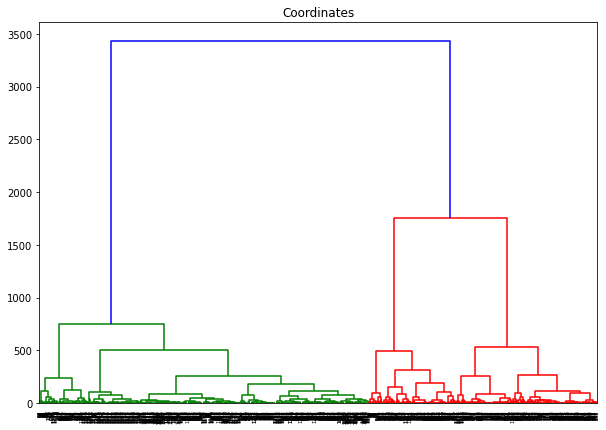

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Coordinates")
dend = shc.dendrogram(shc.linkage(coordinates, method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 3 clusters total.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model_hier_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model_hier_3.fit_predict(coordinates)

array([2, 1, 1, ..., 1, 1, 1])

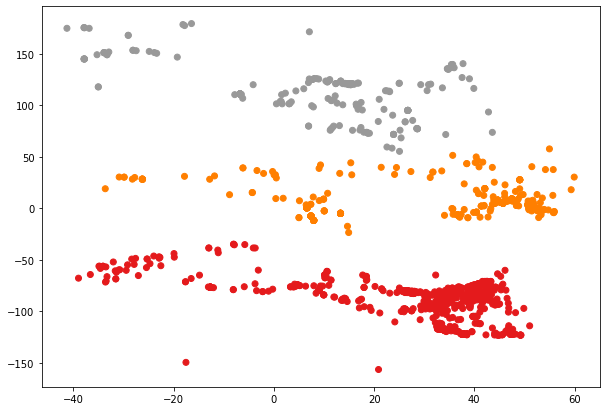

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(coordinates[:,0], coordinates[:,1], c=model_hier_3.labels_, cmap='Set1')

But let us try more than 3. Probably 6 (like number of continents on Earth)

In [ ]:
model_hier_6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model_hier_6.fit_predict(coordinates)

array([0, 1, 4, ..., 4, 4, 4])

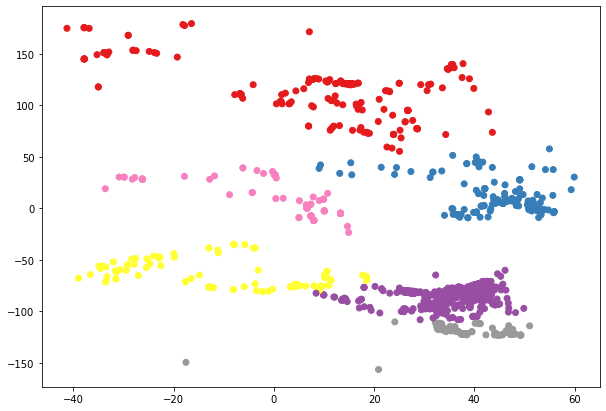

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(coordinates[:,0], coordinates[:,1], c=model_hier_6.labels_, cmap='Set1')

## K-means

In [ ]:
from sklearn.cluster import KMeans

model_km = KMeans(n_clusters=3, random_state=42)

In [ ]:
preds = model_km.fit_predict(coordinates)

In [ ]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

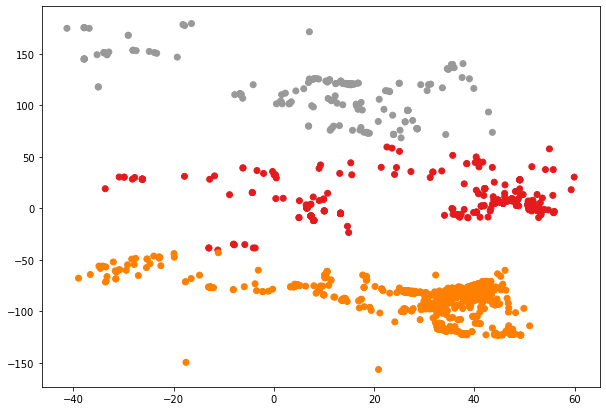

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(coordinates[:,0], coordinates[:,1], c=model_km.labels_, cmap='Set1')

Get the centroid.

In [ ]:
centroids_km = model_km.cluster_centers_
centroids_km

array([[ 27.60083724,   6.0726944 ],
       [ 29.71502549, -87.77550158],
       [  7.28997262, 115.03882456]])

And all the same for 6 clusters.

In [ ]:
model_km_6 = KMeans(n_clusters=6, random_state=42)

In [ ]:
preds = model_km_6.fit_predict(coordinates)

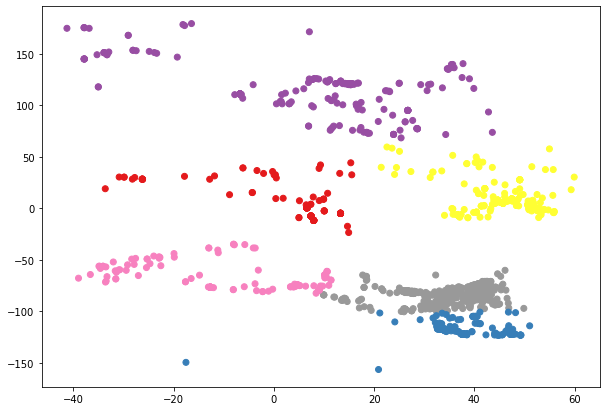

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(coordinates[:,0], coordinates[:,1], c=model_km_6.labels_, cmap='Set1')

In [ ]:
centroids_km_6 = model_km_6.cluster_centers_
centroids_km_6

array([[   4.11561739,    4.25773094],
       [  37.97479027, -117.06389993],
       [   7.28997262,  115.03882456],
       [  45.33238572,    9.25715751],
       [ -11.18763531,  -65.64653257],
       [  35.52300095,  -83.35946446]])

# Visualization

with help of Basemap

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (52.5 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Pr

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
map_plotter = Basemap()

## Draw all places

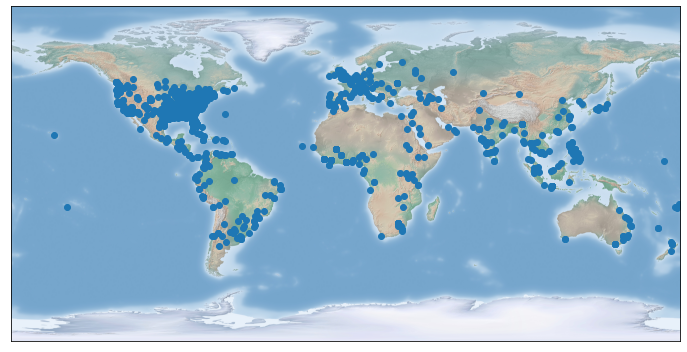

In [ ]:
fig = plt.figure(figsize=(12, 8))

# coordinates : our array with coordinates

latitudes, longitudes = np.array(coordinates).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()

## Draw clusters

### When 3

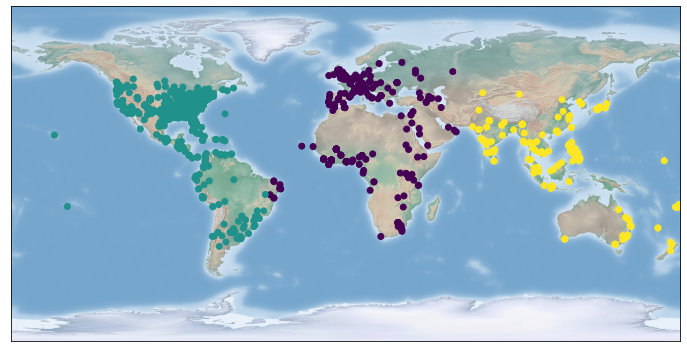

In [ ]:
fig = plt.figure(figsize=(12, 8))

# coordinates: our array with latitudes and longtitudes

latitudes, longitudes = np.array(coordinates).T
map_plotter.scatter(longitudes, latitudes, c=model_km.labels_, latlon=True)
map_plotter.shadedrelief()
plt.show()

### When 6

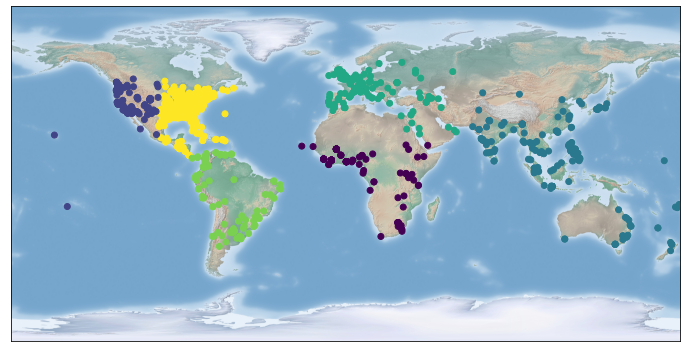

In [ ]:
fig = plt.figure(figsize=(12, 8))

# coordinates: our array with latitudes and longtitudes

latitudes, longitudes = np.array(coordinates).T
map_plotter.scatter(longitudes, latitudes, c=model_km_6.labels_, latlon=True)
map_plotter.shadedrelief()
plt.show()

## Only representative

Draw centroids as the most representative elements.

### When 3

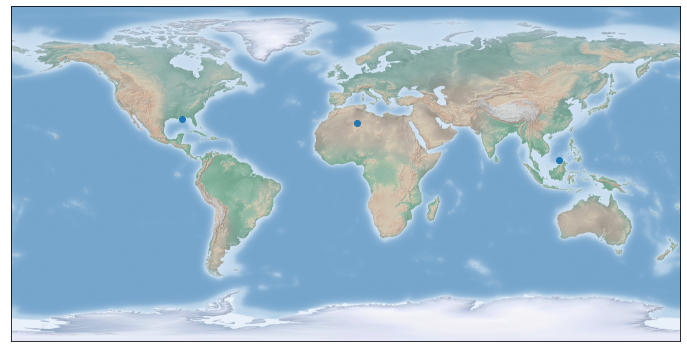

In [ ]:
fig = plt.figure(figsize=(12, 8))

# centroids_km : our array with coordinates of centroids

latitudes, longitudes = np.array(centroids_km).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()

### When 6

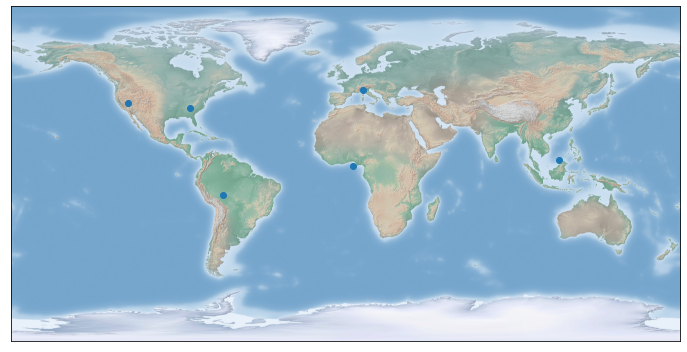

In [ ]:
fig = plt.figure(figsize=(12, 8))

# centroids_km : our array with coordinates of centroids

latitudes, longitudes = np.array(centroids_km_6).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()

# Conclusion

Cannot see any interesting conclusions :c

We have three points on the map which make a line or six points that can be connected as some geometric shape (honestly, I hoped to draw a corona at the end...)